# DIGI405 - Web Scraping Lab

This lab's activities introduces scraping using:  

1. the Google Chrome Web Scraper plugin to automate the browser to crawl a site and extract relevant data;
2. Python code to request and parse an HTML page using BeautifulSoup.  


## Web scraping with webscraper.io

First, install the the [Web Scraper](https://chrome.google.com/webstore/detail/webscraper/jnhgnonknehpejjnehehllkliplmbmhn?hl=en-US) extension for Google Chrome.

You should also open the Web Scraper website, which has [tutorials](http://webscraper.io/tutorials), and good explanations and links to further resources.

Web Scraper integrates with Chrome's Developer Tools so you can scrape web content while taking advantage of the other information available, all within your browser. In Chrome you access Developer Tools with Shift+Ctrl+I, or by finding Developer Tools via the menu. Once Web Scraper is installed it will appear as a tab within the tools:

![](web_scraper_tool.jpg)

### Web scraper intro video

Your tutors should arrange to watch this as a group at the beginning, to avoid chaos!

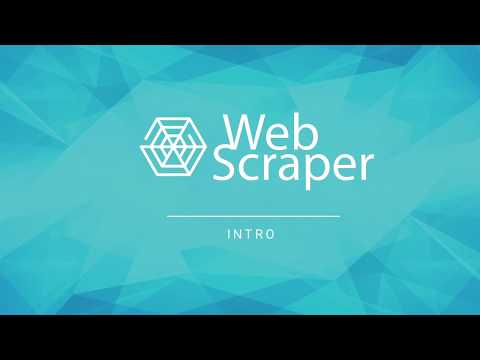

In [7]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('n7fob_XVsbY')

### Task

Let's say you are interested to research media targeted at youths in NZ. You'd like to study the stories on RNZ's [_The Wireless_](https://www.radionz.co.nz/news/the-wireless) website in detail - perhaps using text or network analysis methods. You want some data structured in CSV format in order to explore this in more detail. 

- Create a new Site Map, name it 'wireless', and provide the url ```https://www.radionz.co.nz/news/the-wireless```.  
- Next, create a 'story_links' selector to collects the links to each news story on the first page. It should have a type 'Link' and the 'Multiple' box should be ticked. 
- Use the Element tab in Chrome Developer tools to identify a CSS selector to identify news stories. Hint: it will be a 'class' attribute. The quickest way is to right-click on some part of a page, select 'Inspect', and Chrome will show you the corresponding HTML.
- If you can't find a selector by looking at the HTML, try using the 'Select' button in Web Scraper to graphically select one of the stories. Test the result by clicking 'Element Preview' and 'Data Preview':

![Element and Data Preview](data_preview.jpg)

If you get stuck at this point, ask a neighbour, or your tutor can help. A notebook with solutions will be available on Learn, but try to figure it out in other ways first.

### Collect contents of each story

Next, in the main browswer window click on one of the story links - any one should do - so that you are now viewing a single news story page. In your Web Scraper add on, click into ```story_links``` (ie click its name in the ID column). You are now ready to create some selectors for the content of each story.

Create the following selectors:

* title (Text)
* date (Text)
* story_text (Text) 

Note: be careful when selecting the story text to ensure you are getting the full article body. You can use the 'Element Preview' and 'Data Preview' to check this.

After you've created these, your sitemap graph should look something like this:

![](selector_graph.jpg)

### Dealing with pagination

Automating the data collection from multiple pages will be important for collecting lots of data.

To scrape more than one page of content at a time, we create a `pagination` selector as a child of `_root`, and give it a type of Link. You also need to Control-Click to add `pagination` as a second parent selector of itself. Finally, edit the `story_links` selector and make `pagination` a second parent selector to `story_links`. 

This will make our scraper recursively check for more story links and pagination links, and continue following them. Every time 'Next Page' button is 'clicked' by the scraper, it will then find all the story links and pagination links it can, and it will continue this search until it there are no more pages to scrape.

Your selector graph will look more complex now, but don't worry. It's just the recursive (repeated looping) structure that makes it so. The graph should now look like this:

![](revised-selector-graph.png)

### Get some data

Run the scraper by going to Sitemap Wireless > Scrape. Let it collect several pages, then stop it by closing the popup window where it loads each story page. Press the 'refresh' button to see your data:

![refresh button](refresh.jpg)

Once you see clean data in the Browse view, you can export it to a CSV file that can be imported into Excel, or loaded into Python using the code below.

You can run this code to load data from a sample file. You should change this to the file created when you ran your scraper.

In [ ]:
import pandas as pd
with open('wireless2.csv', encoding='utf-8') as f:  # change the file name for your file
    df = pd.read_csv(f) # read csv into a pandas dataframe
df.head(5) # display the first five rows of the dataframe

### Export script 1 - Text type selector

Use the script below to export your scraped content to a directory of text files *if your text column contains plain text*. 

Please note the following:

- this will only work with data in the CSV format exported from webscraper.io
- you should inspect the webscraper output in CSV format first, to save repeating this process if changes are needed
- you must load the CSV into this notebook as a pandas dataframe using the cell above FIRST
- you must create a directory called 'textfiles' in the same directory as this notebook (or wherever you run the code from)

In [46]:
# once your data is loaded in the cell above and you've created a 'textfiles' directory, run this cell    

text_column_name = 'story_text' #modify this if your column is named something else

for idx, col in df.iterrows():   
    
    with open('textfiles/{}.txt'.format(str(idx)), 'w', encoding='utf-8') as f:
            try:
                f.write(col[text_column_name])
                print('Writing file ' + str(idx))
            except:
                pass # this is a quick workaround for any empty cells - they'll be ignored.
            

### Export script 2 - Grouped type selector

Use the script below to export your scraped content to a directory of text files *if your text column contains JSON*. To capture mutliple paragraphs, you may need to use the 'Grouped' selector in the Webscraper, which outputs JSON data.


In [ ]:
# once your data is loaded in the cell above and you've created a 'textfiles' directory, run this cell    
import json

text_column_name = 'story_text' #modify this if your column is named something else

for idx, col in df.iterrows():   
    
    with open('textfiles/{}.txt'.format(str(idx)), 'w', encoding='utf-8') as f:
        try:
            chunks = json.loads(col[text_column_name]) # this parses the json structure
            for chunk in chunks:
                f.write(chunk[text_column_name])
            print('Writing file ' + str(idx))
        except:
            pass # this is a quick workaround for any empty cells - they'll be ignored.

### Extending your RNZ scraper

A key part of web scraping is inspecting websites closely, scoping out what information is available and working out how best you can retrieve the information you want. 

RNZ uses the same styling through their site, so you can repurpose your scraper to retrieve data from other parts of the RNZ website. For example, if you edit the metadata for your scraper you can change the start URL to crawl another major site section (e.g. their 'Comment & Analysis' section https://www.rnz.co.nz/news/on-the-inside).

Take a look at how many pages of results there are for the Comment & Analysis section. It is the same as The Wireless. One limitation of crawling main site sections on RNZ's site is that it will only show the most recent results (up to 9 pages). 

You can make use of other site functionality though to access older content on the RNZ site by changing the start URL to crawl a tag (e.g. https://www.rnz.co.nz/tags/internet) or specific search results (e.g. https://www.rnz.co.nz/search/results?utf8=%E2%9C%93&q=climate+change&commit=Search). Take a look at those pages and then use the 'Element Preview' feature to confirm that the relevant links from your scraper are highlighted.

## Python for Web Scraping

It's worth exploring how we can use Python to create scripts for web scraping. Although writing your own web scraper may initially be slower than using a program like webscraper.io, ultimately using Python gives us the most flexibility. Coding a scraper is much more powerful, allowing you to capture the data you want and process it or export it how you want.

The main Python libraries that we'll use to do web scraping are:

* [Requests](http://docs.python-requests.org/en/master/) - for requesting web pages
* [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) - for parsing (reading) the HTML and selecting the elements we want

This code will request [The Wireless page](https://www.rnz.co.nz/news/the-wireless) we have been working with so far in the lab and print it out so you can inspect the HTML:

In [ ]:
# import the requests module
import requests

# define the url we want as a string
url = 'https://www.rnz.co.nz/news/the-wireless'

# make the request and assign the result to a variable 'response'
response = requests.get(url)

# the data will be stored in response.text
# if response.text exists, and print it if it does
if response.text:
    print(response.text)
    
# Scroll through the resulting HTML, which will be pretty hard to read.

## BeautifulSoup to the rescue...

BeautifulSoup is a library for parsing HTML (and XML). It is incredibly useful and fairly easy to learn. The documentation pages (linked above) note that it was used to make [this artwork](http://www.nytimes.com/2007/10/25/arts/design/25vide.html), which is an interesting example for its use of both digital and analogue media.

Beautiful Soup provides methods for accessing HTML elements, and their useful attributes such as `id` and `class` attributes.

Here is an example of retrieving the title element:

In [ ]:
from bs4 import BeautifulSoup

# create a BeautifulSoup object using the html.parser
soup = BeautifulSoup(response.text, "html.parser") 
# find the html title tag
title = soup.title

print(title)

But, you would probably just want the text ...

In [ ]:
print(title.get_text())

### Find by class attribute

How would we find links to the list of stories? 

Using the find_all filter you can return specific element types and target them more specifically using their class attribute. This code will each ```<li>``` with the class attribute containing ```o-digest```. You can check the HTML above to verify that these elements contain a story link. 

Note: `class_` with an underscore is used because class is a reserved word in Python.

In [ ]:
stories = soup.find_all('li', class_='o-digest')

for story in stories:
    link = story.a #we want the a element that is a child of the list item
    print(link['href']) #we just want to see the URL

The `.find_all()` method uses CSS selectors just like those used in the webscraper.io browser plugin above. However, BeautifulSoup also has a `.select()` method, which can be more flexible (and looks nicer!):

In [ ]:
 # this class selector captures the lead story also (which is in a div element, not a li element)
stories = soup.select('.o-digest')

for story in stories:
    link = story.a
    print(link['href'])

### Find by regular expression

We can use regular expressions to target specific content in the page.

For example, if we just wanted all the "Wireless Docs" links we can select only links with that text. In the example in the next cell, `re.compile("Wireless Docs:")` defines the regular expression. There is only one string we want to match here, but if we wanted to match "Wireless Docs:" and "Wireless Audio:" we could write an expression like: `re.compile("Wireless\s[A-Z][a-z]+\:")` to match

- "Wireless"
- \s = a space
- [A-Z] = a capital letter
- [a-z] = a lowercase letter
- ```+``` = 1 or more of the preceding character (in this case, lowercase letters)
- a colon (':') character

If we check this using [Regex101](https://regex101.com/) (selecting Python flavour regex) we should see this in action:
![Regex 101 example](regex_wireless.jpg)

In [ ]:
import re

regex_results = soup.find_all(string=re.compile("Wireless Docs:")) # just Wireless Docs to match here

for result in regex_results:
    link = result.find_parent('a', class_='faux-link') # just want the relevant links
    if link is not None:
        print(link.get_text(),link['href'])

### Tasks

Continue investigating _The Wireless_ and try to copy and modify code from above to:

1. Modify the regular expression to list all the 'Someday Stories' articles from https://www.rnz.co.nz/news/the-wireless
2. Copy and modify the code to collect all the links in the text of this article: https://www.radionz.co.nz/news/the-wireless/375285/feature-artificial-affection-the-psychology-of-human-robot-interactions. Hint: You'll want to use `soup.find()` rather than `soup.find_all()` to get the body of the article, since you're looking for one thing rather than a list of things.
3. For the story https://www.radionz.co.nz/news/the-wireless/375285/feature-artificial-affection-the-psychology-of-human-robot-interactions, write code to extract the photo caption text using `.select()` and CSS selectors. 
4. On the page https://www.rnz.co.nz/news/the-wireless the articles with video are indicated with (VIDEO) after the description. Write some code to find all stories and test whether a story contains video. Your code should output the URL to each story that features video.

There is a notebook with solutions for each of the four tasks on Learn. Try your best to write the code using the examples above. You can use the solutions to check your answer or to help you if you get stuck.

## Finished?

#### Another web scraping exercise

Try scraping blog entries from the [Food & Grocery Council blog page](https://www.fgc.org.nz/category/news/fgc-blogs/). News and media releases from organisations that advocate or lobby for certain interests are an interesting source of texts. A contrasting view with the Food & Grocery Council, who work on behalf of food distributors and retailers in NZ might be a group advocating reducing plastic waste, or reducing food miles. This might be the start of a comparison where you could use keyness analysis. 

Hint: Watch the [Webscraper.io pagination tutorial](https://www.youtube.com/watch?v=x8bZmUrJBl0) first. For this site you can use the first method (figure out how many pages and then specify [1-x] in the starting URL.

#### Or ...

See if you can use your new web scraping skills on your Corpus Analysis assignment.